In [271]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Airbnb 주식 분석

## 선형회귀

In [272]:
df= pd.read_csv('C://Users/82109/python_da/data/ABNB.csv')
df.shape

(454, 7)

In [273]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.0000,454.0000,454.0000,454.0000,454.0000,454.0000
mean,152.7359,156.4656,148.9699,152.7292,152.7292,6690328.1938
std,28.3409,29.1078,27.4902,28.2267,28.2267,4417386.7313
min,88.8800,91.4600,86.7100,89.0800,89.0800,1995400.0000
25%,136.8215,139.8425,132.9200,135.9550,135.9550,4114375.0000
50%,154.9325,159.1000,151.2300,155.6550,155.6550,5450000.0000
75%,172.5565,175.9750,168.5950,171.7450,171.7450,7631375.0000
max,216.2400,219.9400,209.0900,216.8400,216.8400,39755000.0000


In [274]:
df.value_counts()

Date        Open      High      Low       Close     Adj Close  Volume  
2020-12-11  146.5500  151.5000  135.1000  139.2500  139.2500   26980800    1
2022-01-28  138.5450  143.1100  134.3740  142.7700  142.7700   5604400     1
2022-03-08  131.6300  144.4700  131.5000  142.1300  142.1300   9587000     1
2022-03-07  145.0000  145.2700  131.5200  131.5900  131.5900   9177300     1
2022-03-04  150.7700  151.8900  140.4600  142.7000  142.7000   8390800     1
                                                                          ..
2021-07-15  139.1800  140.5200  136.5400  137.5000  137.5000   6576100     1
2021-07-14  143.8600  144.2000  139.0400  139.0900  139.0900   8545500     1
2021-07-13  147.6950  147.6950  143.0000  143.4100  143.4100   5871500     1
2021-07-12  148.9900  150.4200  146.0100  146.6900  146.6900   3276300     1
2022-09-30  104.7600  109.0800  104.7300  105.0400  105.0400   4747800     1
Length: 454, dtype: int64

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


# Data Dictionary
* #### Date :(YYYY-MM-DD)
* #### Open : 시장 개장 시 가격
* #### High : 당일 최고가 기록
* #### Low : 당일 최저가 기록
* #### Close : 시장이 닫힐 때의 가격
* #### Adj Close : 기업 활동에 따라 수정된 종가
* #### Volume : 하루에 팔린 주식의 양
* #### quarter : 분기

In [276]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.5500,151.5000,135.1000,139.2500,139.2500,26980800
1,2020-12-14,135.0000,135.3000,125.1600,130.0000,130.0000,16966100
2,2020-12-15,126.6900,127.6000,121.5000,124.8000,124.8000,10914400
3,2020-12-16,125.8300,142.0000,124.9100,137.9900,137.9900,20409600
4,2020-12-17,143.0000,152.4500,142.6700,147.0500,147.0500,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.7800,105.3600,101.5600,103.2300,103.2300,5278800
450,2022-09-27,106.0400,108.1700,104.1400,106.3700,106.3700,5081000
451,2022-09-28,106.7010,111.1300,105.7800,110.6900,110.6900,4518200
452,2022-09-29,109.1900,109.4750,105.1700,106.6600,106.6600,4259500


# 데이터 전처리

In [277]:
# 숫자 dtype 추출
df_num=df.select_dtypes(exclude=['object']).columns
df_num

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [278]:
# 객체 dtype 추출
df_obj = df.select_dtypes(include=['object']).columns
df_obj

Index(['Date'], dtype='object')

In [279]:
# 결측치 없는거 확인
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [280]:
# 소숫점 두번째 자리까지만 표시
pd.options.display.float_format = '{:.4f}'.format
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.5500,151.5000,135.1000,139.2500,139.2500,26980800
1,2020-12-14,135.0000,135.3000,125.1600,130.0000,130.0000,16966100
2,2020-12-15,126.6900,127.6000,121.5000,124.8000,124.8000,10914400
3,2020-12-16,125.8300,142.0000,124.9100,137.9900,137.9900,20409600
4,2020-12-17,143.0000,152.4500,142.6700,147.0500,147.0500,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.7800,105.3600,101.5600,103.2300,103.2300,5278800
450,2022-09-27,106.0400,108.1700,104.1400,106.3700,106.3700,5081000
451,2022-09-28,106.7010,111.1300,105.7800,110.6900,110.6900,4518200
452,2022-09-29,109.1900,109.4750,105.1700,106.6600,106.6600,4259500


In [282]:
df.Date = df.Date.str.extract('([\d\.]+)').astype('float64')
df.Date.head()

0   2020.0000
1   2020.0000
2   2020.0000
3   2020.0000
4   2020.0000
Name: Date, dtype: float64

In [283]:
df.value_counts()

Date       Open      High      Low       Close     Adj Close  Volume  
2020.0000  125.8300  142.0000  124.9100  137.9900  137.9900   20409600    1
2022.0000  99.7000   102.7100  98.7600   102.2000  102.2000   5603800     1
           110.3600  114.2280  109.9700  111.3900  111.3900   6057400     1
           110.0000  113.9600  107.4800  111.2000  111.2000   6019500     1
           109.7400  115.5500  108.1100  114.3000  114.3000   6883200     1
                                                                         ..
2021.0000  170.0290  171.8100  167.3710  169.9600  169.9600   4353600     1
           170.0000  171.5400  166.6300  166.6700  166.6700   2046300     1
                     171.2700  168.6000  169.6000  169.6000   2119600     1
           169.8060  172.4300  168.7800  171.6800  171.6800   2725200     1
2022.0000  184.9000  188.9800  181.5400  183.6000  183.6000   7779200     1
Length: 454, dtype: int64

In [284]:
# Adj Close, Close 같은지 확인
df['Adj Close'].value_counts()

157.9100    3
139.2500    2
142.7700    2
114.4400    2
170.5000    2
           ..
141.5800    1
142.0000    1
138.7300    1
139.4700    1
105.0400    1
Name: Adj Close, Length: 440, dtype: int64

In [285]:
df['Close'].value_counts()

157.9100    3
139.2500    2
142.7700    2
114.4400    2
170.5000    2
           ..
141.5800    1
142.0000    1
138.7300    1
139.4700    1
105.0400    1
Name: Close, Length: 440, dtype: int64

In [286]:
# Adj Close 드랍
df.drop('Adj Close', axis=1, inplace=True)
df

,Date,Open,High,Low,Close,Volume
0,2020.0000,146.5500,151.5000,135.1000,139.2500,26980800
1,2020.0000,135.0000,135.3000,125.1600,130.0000,16966100
2,2020.0000,126.6900,127.6000,121.5000,124.8000,10914400
3,2020.0000,125.8300,142.0000,124.9100,137.9900,20409600
4,2020.0000,143.0000,152.4500,142.6700,147.0500,15054700
...,...,...,...,...,...,...
449,2022.0000,101.7800,105.3600,101.5600,103.2300,5278800
450,2022.0000,106.0400,108.1700,104.1400,106.3700,5081000
451,2022.0000,106.7010,111.1300,105.7800,110.6900,4518200
452,2022.0000,109.1900,109.4750,105.1700,106.6600,4259500


In [287]:
# 많이 팔린 것과 비교를 해야하기 때문에 Volume을 기준으로 잡고 비교
# 날짜에 따른 판매량
df_date =df.groupby('Date')['Volume'].mean().sort_values(ascending=False)
df_date

Date
2020.0000   11521721.4286
2022.0000    6568439.3617
2021.0000    6512850.3968
Name: Volume, dtype: float64

In [288]:
# 시장 개장시에 따른 판매량
df_open = df.groupby('Open')['Volume'].mean().sort_values(ascending=False)
df_open

Open
137.1560   39755000.0000
97.5200    28797400.0000
186.1500   27330500.0000
146.5500   26980800.0000
154.6200   24062400.0000
                ...     
171.3900    2294400.0000
171.3200    2292600.0000
167.0600    2181100.0000
170.2000    2143700.0000
169.5200    1995400.0000
Name: Volume, Length: 437, dtype: float64

In [289]:
# 최고점에 따른 판매량
df_high =df.groupby('High')['Volume'].mean().sort_values(ascending=False)
df_high

High
137.7900   39755000.0000
104.1800   28797400.0000
203.2950   27330500.0000
151.5000   26980800.0000
158.3100   24062400.0000
                ...     
170.8500    2181100.0000
171.8500    2143700.0000
171.2700    2119600.0000
171.5400    2046300.0000
170.4800    1995400.0000
Name: Volume, Length: 442, dtype: float64

In [290]:
# 최저점에대한 판매량
df_low =df.groupby('Low')['Volume'].mean().sort_values(ascending=False)
df_low

Low
130.2530   39755000.0000
96.3300    28797400.0000
185.9440   27330500.0000
135.1000   26980800.0000
149.4400   24062400.0000
                ...     
169.4800    2265100.0000
168.7100    2143700.0000
168.6000    2119600.0000
166.6300    2046300.0000
165.0200    1995400.0000
Name: Volume, Length: 438, dtype: float64

In [291]:
# 종가에대한 판매량
df_close =df.groupby('Close')['Volume'].mean().sort_values(ascending=False)
df_close

Close
132.5000   39755000.0000
103.5100   28797400.0000
201.6200   27330500.0000
115.0200   23354900.0000
186.6400   22252900.0000
                ...     
169.9700    2265100.0000
168.7800    2181100.0000
171.7000    2143700.0000
166.6700    2046300.0000
167.4400    1995400.0000
Name: Volume, Length: 440, dtype: float64

In [ ]:
df

In [293]:
# 소숫점 두번째 자리까지만 표시
pd.options.display.float_format = '{:.4f}'.format
df

,Date,Open,High,Low,Close,Volume
0,2020.0000,146.5500,151.5000,135.1000,139.2500,26980800
1,2020.0000,135.0000,135.3000,125.1600,130.0000,16966100
2,2020.0000,126.6900,127.6000,121.5000,124.8000,10914400
3,2020.0000,125.8300,142.0000,124.9100,137.9900,20409600
4,2020.0000,143.0000,152.4500,142.6700,147.0500,15054700
...,...,...,...,...,...,...
449,2022.0000,101.7800,105.3600,101.5600,103.2300,5278800
450,2022.0000,106.0400,108.1700,104.1400,106.3700,5081000
451,2022.0000,106.7010,111.1300,105.7800,110.6900,4518200
452,2022.0000,109.1900,109.4750,105.1700,106.6600,4259500


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    454 non-null    float64
 1   Open    454 non-null    float64
 2   High    454 non-null    float64
 3   Low     454 non-null    float64
 4   Close   454 non-null    float64
 5   Volume  454 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.4 KB


In [295]:
# 이상치 없음 확인
df['Volume'].sort_values(ascending=False)

106    39755000
385    28797400
227    27330500
0      26980800
256    24062400
         ...   
264     2181100
221     2143700
206     2119600
208     2046300
263     1995400
Name: Volume, Length: 454, dtype: int64

In [296]:
df[df['Volume']>=12906875.0]

,Date,Open,High,Low,Close,Volume
0,2020.0000,146.5500,151.5000,135.1000,139.2500,26980800
1,2020.0000,135.0000,135.3000,125.1600,130.0000,16966100
3,2020.0000,125.8300,142.0000,124.9100,137.9900,20409600
4,2020.0000,143.0000,152.4500,142.6700,147.0500,15054700
5,2020.0000,150.4500,159.0000,150.3000,157.3000,15954200
6,2020.0000,155.3100,172.0000,145.1100,163.0200,17788100
26,2021.0000,164.9900,183.4700,155.3300,180.4000,17618400
51,2021.0000,194.1800,214.1000,185.7500,206.3500,19368600
52,2021.0000,195.8200,199.6900,192.6200,196.4200,15798500
104,2021.0000,142.2500,142.3290,131.2800,135.7500,13005400


In [297]:
df[df['Volume']<=(-1161125.0)]

,Date,Open,High,Low,Close,Volume


In [300]:
df

,Date,Open,High,Low,Close,Volume
0,2020.0000,146.5500,151.5000,135.1000,139.2500,26980800
1,2020.0000,135.0000,135.3000,125.1600,130.0000,16966100
2,2020.0000,126.6900,127.6000,121.5000,124.8000,10914400
3,2020.0000,125.8300,142.0000,124.9100,137.9900,20409600
4,2020.0000,143.0000,152.4500,142.6700,147.0500,15054700
...,...,...,...,...,...,...
449,2022.0000,101.7800,105.3600,101.5600,103.2300,5278800
450,2022.0000,106.0400,108.1700,104.1400,106.3700,5081000
451,2022.0000,106.7010,111.1300,105.7800,110.6900,4518200
452,2022.0000,109.1900,109.4750,105.1700,106.6600,4259500


# 데이터셋 나누기

In [302]:
# 독립변수, 종속변수 설정
X = df[['Open','High','Low','Close']]
# 종속변수 : 보험료
y = df['Volume']


# 모델링

In [303]:
from sklearn.linear_model import LinearRegression

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=100)

In [306]:
model = LinearRegression()

In [307]:
model.fit(X_train, y_train)

LinearRegression()

In [310]:
actual = model.predict(X)

In [311]:
# title model.predict()
pred = model.predict(X_test)

In [312]:
y_predicted = model.predict(X)

# 선형_회귀

In [313]:
# 테이블로 평가

In [314]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
X_test
comparison

,actual,pred
330,4065000,5603082.3455
416,4201200,6315697.2319
320,4099900,5572593.4363
425,6057400,7106018.4840
311,7023900,6019902.2850
...,...,...
288,4577100,5830372.0005
21,12529700,13157267.3177
272,5331600,8762305.1582
19,2801900,6667636.0988


In [315]:
# 그래프로 평가

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

KeyError: 'actual'

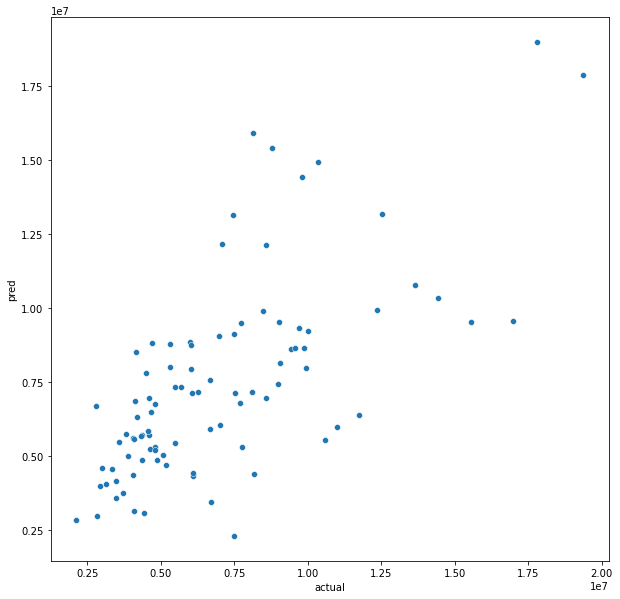

In [317]:
# 산점도 그리기 (sns.scatterplot())
plt.figure(figsize=(10,10)) # 사이즈 설정
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)
plt.xlim(df['actual'].min()-1, df['actual'].max()+1)
plt.grid()
plt.show()

In [318]:
df.corr()

,Date,Open,High,Low,Close,Volume
Date,1.0000,-0.5165,-0.5139,-0.5162,-0.5163,-0.0828
Open,-0.5165,1.0000,0.9924,0.9922,0.9840,-0.1615
High,-0.5139,0.9924,1.0000,0.9900,0.9930,-0.1184
Low,-0.5162,0.9922,0.9900,1.0000,0.9923,-0.1868
Close,-0.5163,0.9840,0.9930,0.9923,1.0000,-0.1374
Volume,-0.0828,-0.1615,-0.1184,-0.1868,-0.1374,1.0000


<AxesSubplot:>

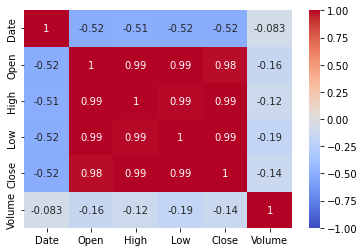

In [319]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

# mean_squared_error()

In [320]:
from sklearn.metrics import mean_squared_error

In [321]:
# MSE
# mean_squared_error(y_test, pred)
# RMSE
mean_squared_error(y_test, pred) ** 0.5

2733156.6749543697

In [322]:
mean_squared_error(y_test, pred, squared=False)

2733156.6749543697

In [323]:
model.score(X_train, y_train)

0.25329572676763756

In [324]:
df.corr()

,Date,Open,High,Low,Close,Volume
Date,1.0000,-0.5165,-0.5139,-0.5162,-0.5163,-0.0828
Open,-0.5165,1.0000,0.9924,0.9922,0.9840,-0.1615
High,-0.5139,0.9924,1.0000,0.9900,0.9930,-0.1184
Low,-0.5162,0.9922,0.9900,1.0000,0.9923,-0.1868
Close,-0.5163,0.9840,0.9930,0.9923,1.0000,-0.1374
Volume,-0.0828,-0.1615,-0.1184,-0.1868,-0.1374,1.0000


# 로지스틱_회귀

In [325]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [326]:
model.fit(X_train, y_train)

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
pred = model.predict(X_test)

In [329]:
model.coef_

array([[ 0.34443315, -0.35131718,  0.12455264, -0.10102989],
       [ 0.2673157 , -0.2172248 ,  0.45474038, -0.48638696],
       [-0.05521568, -0.68724482,  0.46832675,  0.30223741],
       ...,
       [-1.16394684,  0.5082207 , -0.39424996,  0.9950617 ],
       [-0.61321634,  0.36205641, -0.47557895,  0.69423887],
       [ 0.59003358,  0.04129914, -0.28820454, -0.34961853]])

In [330]:
pd.options.display.float_format = '{:.4f}'.format
pd.Series(model.coef_[0], index = X.columns)

Open     0.3444
High    -0.3513
Low      0.1246
Close   -0.1010
dtype: float64

# KNN

In [331]:
from sklearn.preprocessing import MinMaxScaler

In [332]:
mm_scaler = MinMaxScaler()

In [333]:
mm_scaler.fit(X_train)

MinMaxScaler()

In [334]:
X_train_scaled = mm_scaler.transform(X_train)
X_train_scaled

array([[0.77338392, 0.74122526, 0.78028629, 0.75872492],
       [0.33827586, 0.31261967, 0.356319  , 0.32458863],
       [0.49427449, 0.46083283, 0.49218812, 0.46188087],
       ...,
       [0.64549529, 0.60649329, 0.63299798, 0.60553305],
       [0.48670949, 0.45134016, 0.40089975, 0.45194367],
       [0.58874962, 0.5876675 , 0.56237219, 0.53231573]])

In [335]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
X_test_scaled

array([[ 7.03228335e-01,  6.74138433e-01,  6.81963149e-01,
         6.37252631e-01],
       [ 2.07998247e-01,  1.68235450e-01,  2.13087959e-01,
         1.85944831e-01],
       [ 5.95088362e-01,  5.87069249e-01,  6.15541922e-01,
         5.99332246e-01],
       [ 1.71049106e-01,  1.56732570e-01,  1.89938658e-01,
         1.61698045e-01],
       [ 4.50317713e-01,  4.49984070e-01,  4.79182020e-01,
         4.55203102e-01],
       [ 6.69217631e-01,  6.67437763e-01,  6.97341513e-01,
         6.61419840e-01],
       [ 6.82046256e-01,  6.57147455e-01,  7.10511256e-01,
         6.74377985e-01],
       [ 4.94354202e-01,  4.49744775e-01,  4.87934511e-01,
         4.60449966e-01],
       [ 8.96335414e-01,  8.52903622e-01,  8.24130879e-01,
         8.23833339e-01],
       [ 3.27047742e-01,  3.49393770e-01,  3.51411100e-01,
         3.74751583e-01],
       [ 8.07068135e-01,  8.01052951e-01,  8.38691198e-01,
         8.04276998e-01],
       [ 6.85948253e-01,  6.57626053e-01,  7.02126847e-01,
      

In [336]:
from sklearn.neighbors import KNeighborsClassifier

In [337]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

In [338]:
pred

array([3125700, 4067100, 2461500, 3634000, 4737500, 3551400, 2549400,
       3462400, 2791400, 8179200, 2921400, 2549400, 2605800, 3116000,
       2409700, 6452400, 3775600, 5149800, 2461500, 3462400, 4685400,
       4113000, 4466800, 5915300, 5669500, 3877200, 8179200, 3116000,
       3331200, 3756100, 4639300, 2795800, 2181100, 5703000, 2143700,
       5703000, 2181100, 2605800, 3331200, 5302500, 5703000, 3997900,
       3331200, 2605800, 3968700, 4067100, 2409700, 3756100, 5669500,
       4637800, 4167100, 4160200, 5603800, 2461500, 3521900, 3041700,
       3339900, 2811100, 3878600, 2292600, 2409700, 2181100, 4213900,
       4826500, 4826500, 2294400, 3878600, 4067100, 5669500, 3878600,
       2795800, 5149800, 6879600, 4067100, 2776600, 3674200, 3462400,
       3116000, 6094600, 4309100, 5669500, 3756100, 5556500, 4064000,
       7215700, 5669500, 4737500, 4223500, 2461500, 2795800, 2292600],
      dtype=int64)

In [339]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.0

In [340]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
accuracy_score(y_test,pred2)

0.0

In [341]:
def tuning(n: int) -> float: 
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  score = accuracy_score(y_test, pred)
  return score

In [342]:
for i in range(1,21):
  print(tuning(i))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [343]:
scores = [(i, tuning(i)) for i in range(1, 21)]
scores

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0)]

In [344]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0)]

# 나이브_베이즈

In [345]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [346]:
from sklearn.metrics import accuracy_score, confusion_matrix

<AxesSubplot:>

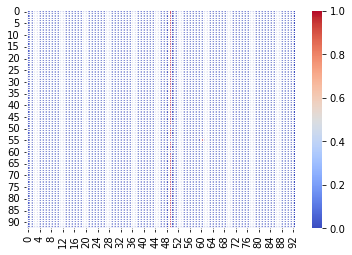

In [347]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='coolwarm', annot=True, fmt='.0f')

# 결정트리

In [348]:
from sklearn.model_selection import train_test_split
X = df.drop('Volume', axis=1)
y = df['Volume']
X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size=0.4, random_state=100)

In [349]:
from sklearn.tree import DecisionTreeClassifier

In [350]:
model = DecisionTreeClassifier(random_state=100)

In [351]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [352]:
pred = model.predict(X_test)

In [353]:
pred

array([ 3232200,  6000800,  4146600,  5447200,  8390800,  3551400,
        2409700,  5149800,  3740400, 18555600,  3565600,  3644900,
        3488100,  3116000,  4763300, 11367200,  4884700,  4737500,
        4655500,  5149800,  8592500,  3339900,  5604400,  9587300,
        6522600,  9415100, 18555600,  5902400,  3775600,  6079900,
        7855100,  7855100,  8592500, 11293100,  2143700, 11293100,
        4847600,  4329400,  3331200,  5302500, 11293100,  7645700,
        3373900,  4329400,  9787100,  6936900,  3644900,  6079900,
        5669500,  5447200,  4466800,  3331200,  9587300,  4690700,
        3644900,  3041700,  7645700,  5113100,  8592500,  3009800,
       10682700,  5660400,  8390800,  5149800,  9787100,  2788700,
        4146600,  4067100, 11293100,  8592500,  4737500,  4737500,
        5166200,  6000800,  2776600,  9144900,  8040200,  5902400,
        6330200,  5852500,  5669500,  6079900,  3460600,  9264300,
        2795800,  5669500,  6990300,  4655500,  7211900,  9798

In [354]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.0

In [355]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model.fit(X_train,y_train) # 훈련 데이터를 통한 모델 학습
train_pred = model.predict(X_train) # 훈련 데이터로 모델을 통해서 예측한 값
test_pred = model.predict(X_test) # 시험 데이터로 모델을 통해서 예측한 값
# 문제를 풀어서 나온 답 97%
print('Train score:', accuracy_score(y_train,train_pred)) # 97%
print('Test score:', accuracy_score(y_test,test_pred)) # 81%

Train score: 1.0
Test score: 0.0


In [356]:
# 깊이를 제한했더니 학습이 덜되면서 오히려 새로운 데이터에 대한 예측력 상승
model = DecisionTreeClassifier(max_depth=5, random_state=100)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train score:', accuracy_score(y_train,train_pred)) # 85%
print('Test score:', accuracy_score(y_test,test_pred)) # 84.9%

Train score: 0.07352941176470588
Test score: 0.0


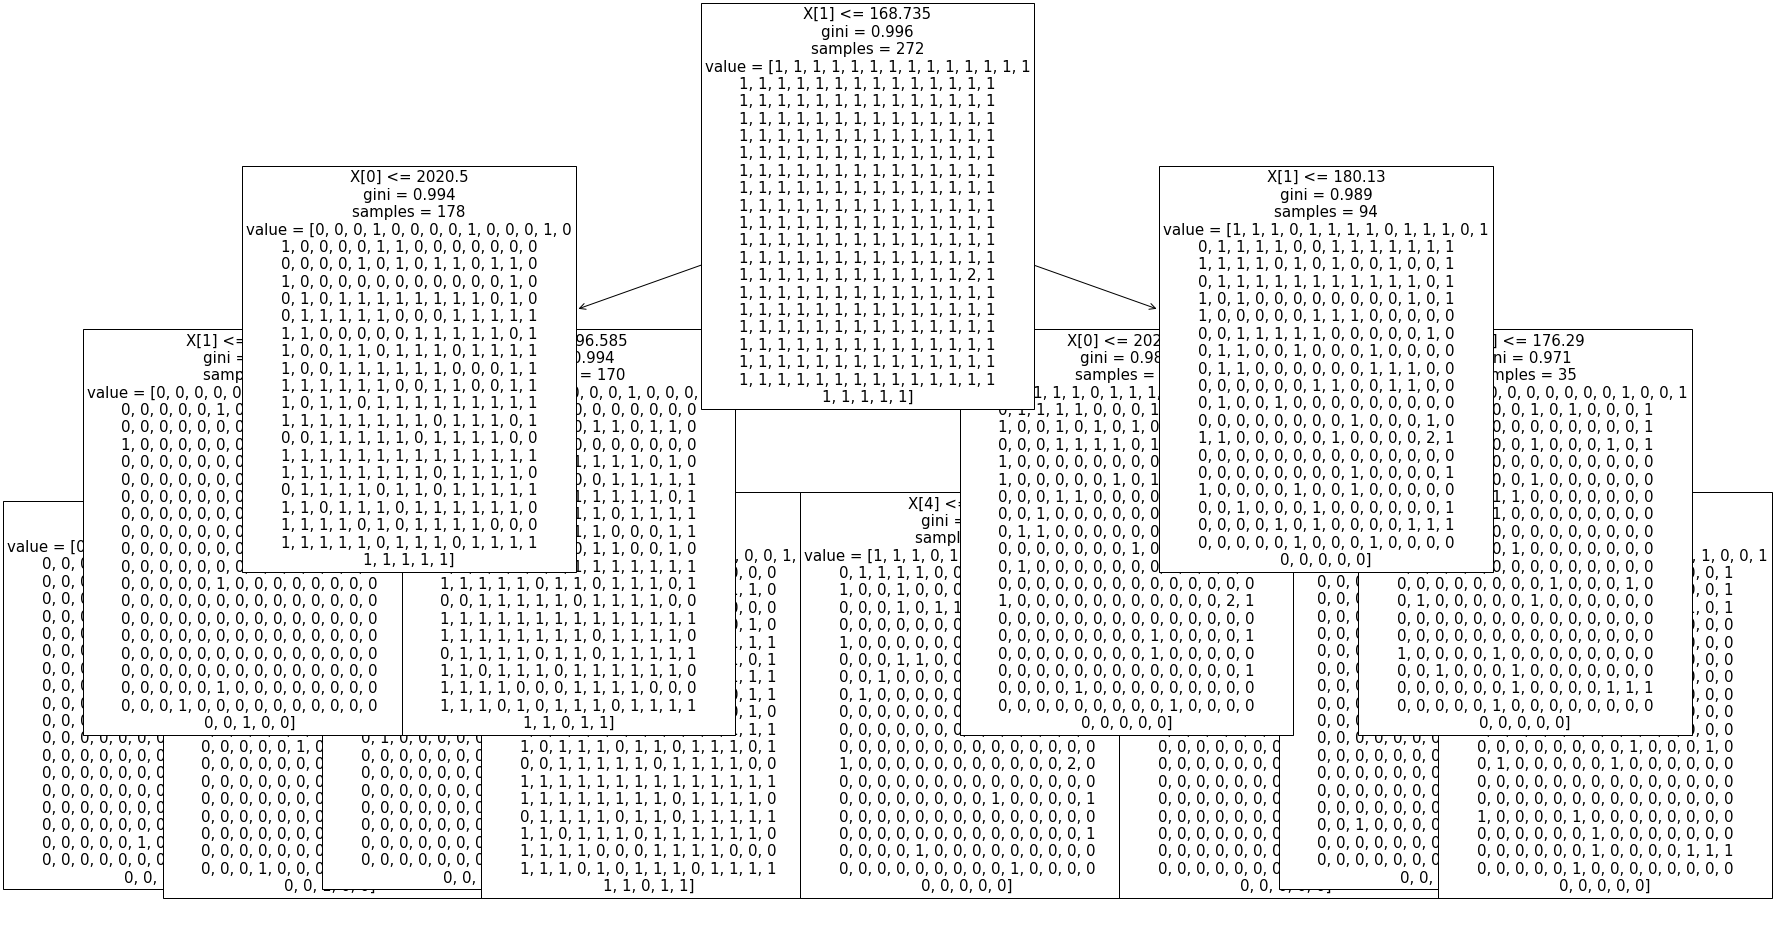

In [357]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model, max_depth=3, fontsize=15)
plt.show()

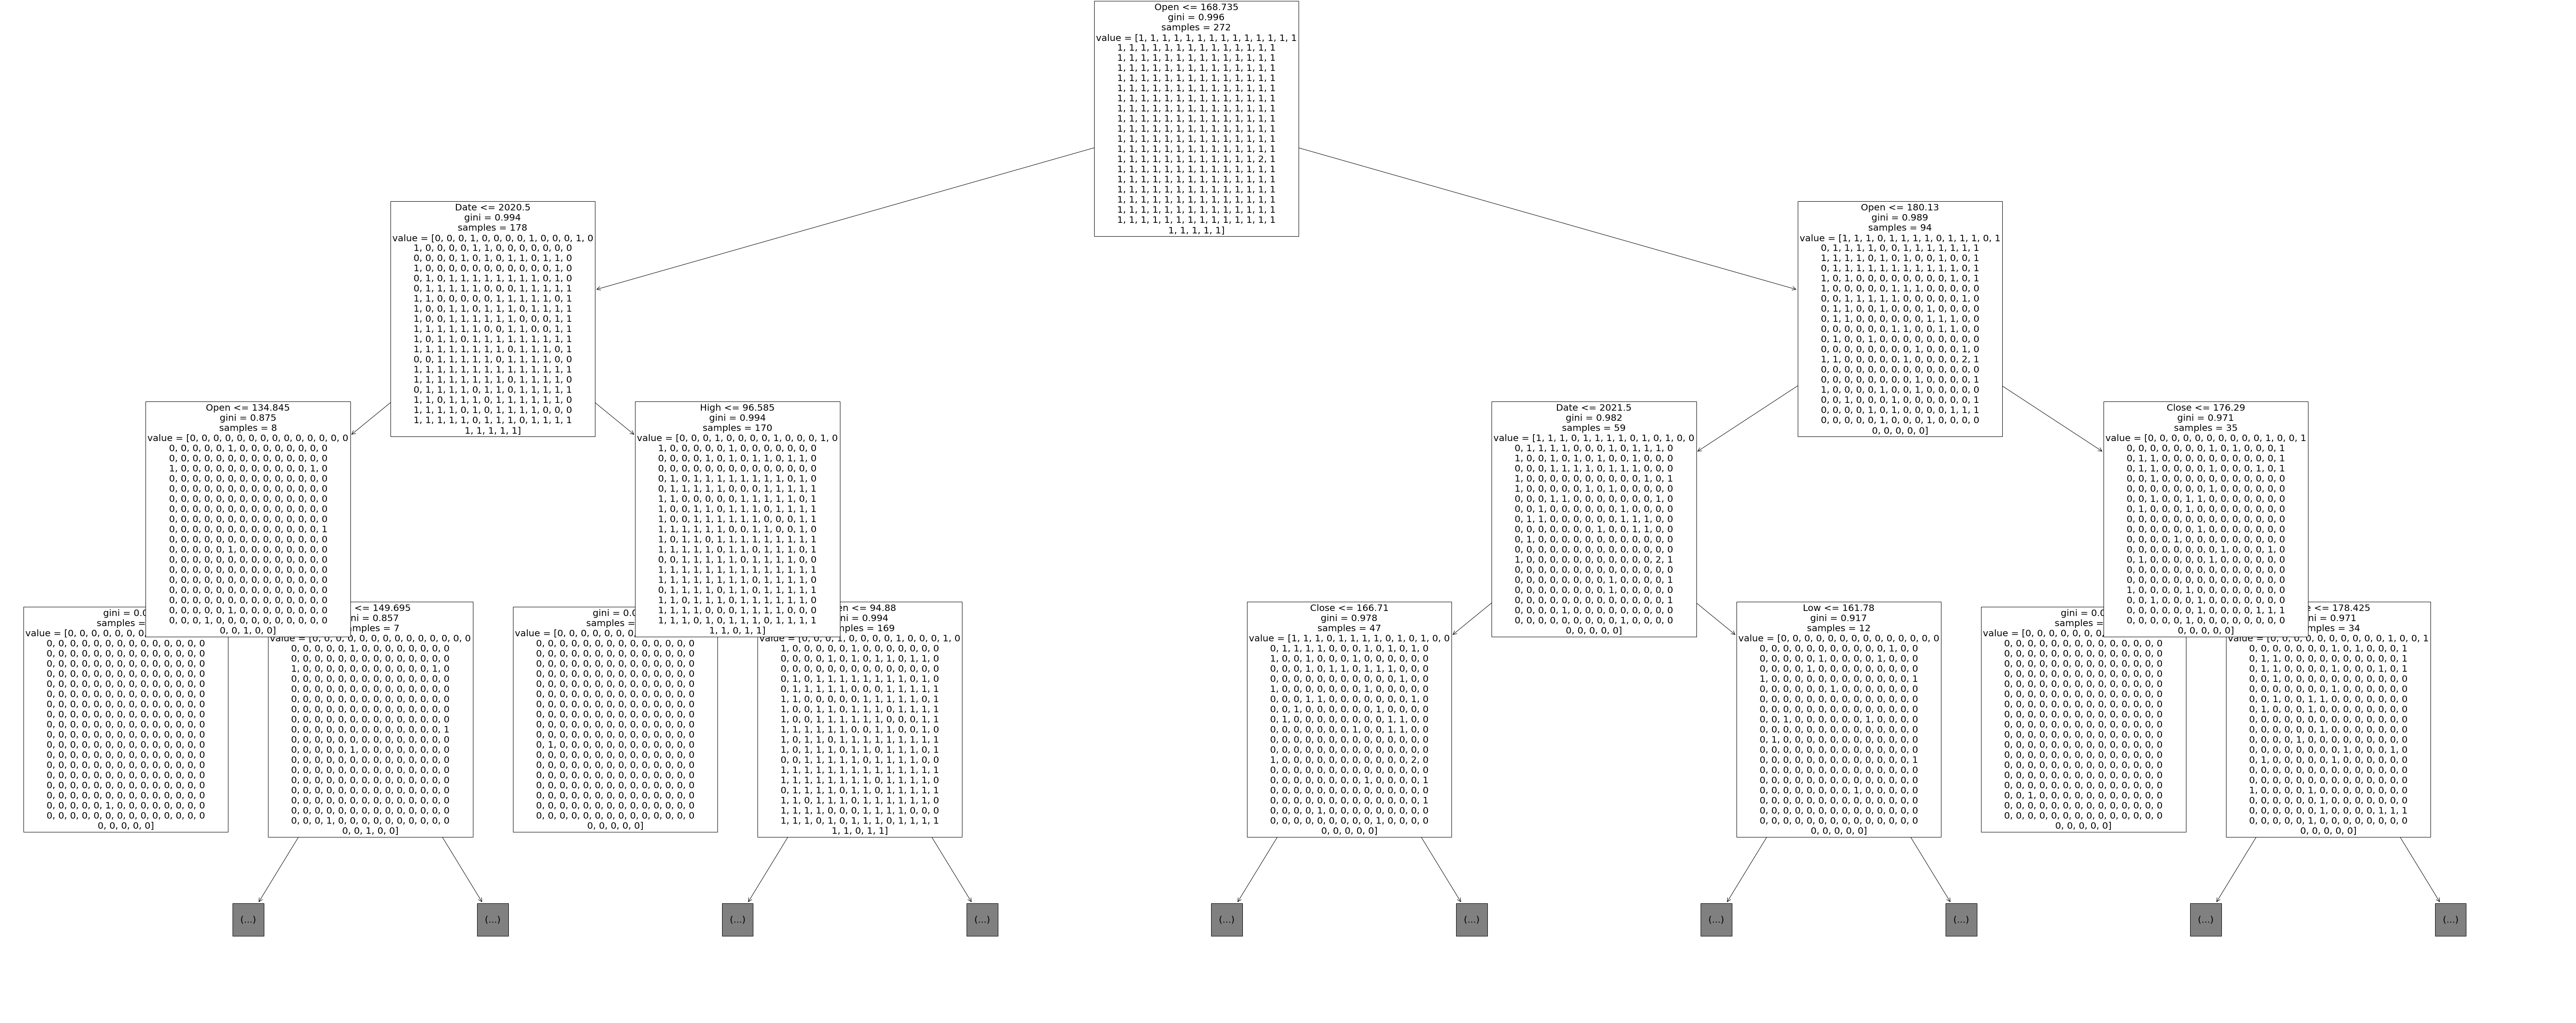

In [361]:
plt.figure(figsize=(100,40))
plot_tree(model, max_depth= 3, fontsize=20, feature_names= X_train.columns)
plt.show()